# Airline Customer Satisfaction Prediction - Data Pipeline

**Objective**: Prepare airline review data for satisfaction prediction model
**Dataset**: AirlineScrappedReview.csv (3,575 reviews)
**Target**: Binary satisfaction (rating >= 5)

## Methodology Overview
1. **Environment Setup**: Import libraries and configure settings
2. **Data Loading**: Load raw data and perform initial validation
3. **Data Analysis**: Comprehensive EDA to understand data patterns
4. **Data Cleaning**: Handle missing values and remove unnecessary features
5. **Feature Engineering**: Create new features and transform existing ones
6. **Feature Encoding**: Convert categorical variables for ML algorithms  
7. **Final Dataset**: Export clean, encoded data for modeling


## 1. Environment Setup

All imports, installations, and configuration in one place.


In [2]:
# Install required packages
!pip install vaderSentiment

# Core data manipulation and analysis
import pandas as pd
import numpy as np

# Machine learning preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Configuration
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
plt.style.use('default')
sns.set_palette("husl")

print("✅ Environment setup complete")


✅ Environment setup complete


## 2. Data Loading & Initial Validation

Load data with proper preprocessing and immediate quality checks.


In [3]:
# Load dataset with error handling
try:
    df = pd.read_csv('/kaggle/input/airline-scrapped-review-cleaned/AirlineScrappedReview_Cleaned.csv')
    print(f"✅ Successfully loaded dataset: {df.shape[0]} rows × {df.shape[1]} columns")
except FileNotFoundError:
    print("❌ File not found. Please check the file path.")
    raise

# Standardize column names (lowercase, consistent naming)
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Display basic information
print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\nColumn names:")
print(df.columns.tolist())


✅ Successfully loaded dataset: 3575 rows × 18 columns

DATASET OVERVIEW
Shape: (3575, 18)
Memory usage: 6.99 MB

Column names:
['passanger_name', 'flying_date', 'route', 'rating', 'verified', 'review_title', 'review_content', 'traveller_type', 'class', 'start_location', 'end_location', 'layover_route', 'start_latitude', 'start_longitude', 'start_address', 'end_latitude', 'end_longitude', 'end_address']


In [4]:
# Initial data preview
print("FIRST 3 ROWS:")
print("-" * 60)
display(df.head(3))

print("\nDATA TYPES:")
print("-" * 30)
print(df.dtypes)


FIRST 3 ROWS:
------------------------------------------------------------


,passanger_name,flying_date,route,rating,verified,review_title,review_content,traveller_type,class,start_location,end_location,layover_route,start_latitude,start_longitude,start_address,end_latitude,end_longitude,end_address
0,Paige Boet,June 2023,New Orleans to London,1,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,New Orleans,London,NaN,29.975998,-90.078213,"New Orleans, Orleans Parish, Louisiana, United...",51.507446,-0.127765,"London, Greater London, England, United Kingdom"
1,S Layne,March 2023,London to Amman,1,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,London,Amman,NaN,51.507446,-0.127765,"London, Greater London, England, United Kingdom",31.951569,35.923963,"عمان, ناحية عمان, لواء قصبة عمان, عمان, 11110,..."
2,E Lanewoski,NaN,Heathrow to Bodrum,2,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",Solo Leisure,Business Class,London Heathrow,Bodrum,NaN,51.467739,-0.458780,"London Heathrow Airport, The Beacon Roundabout...",37.034399,27.430651,"Bodrum, Muğla, Ege Bölgesi, Türkiye"



DATA TYPES:
------------------------------
passanger_name      object
flying_date         object
route               object
rating               int64
verified            object
review_title        object
review_content      object
traveller_type      object
class               object
start_location      object
end_location        object
layover_route       object
start_latitude     float64
start_longitude    float64
start_address       object
end_latitude       float64
end_longitude      float64
end_address         object
dtype: object


## 3. Comprehensive Data Analysis

Complete EDA to understand data quality, patterns, and relationships.


In [5]:
# DATA QUALITY ASSESSMENT
print("DATA QUALITY REPORT")
print("=" * 50)

print("\n1. MISSING VALUES:")
print("-" * 30)
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percent': missing_percent
}).sort_values('Missing_Count', ascending=False)
print(missing_df[missing_df['Missing_Count'] > 0])

print("\n2. DUPLICATE ROWS:")
print("-" * 30)
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

print("\n3. DATA TYPES & MEMORY:")
print("-" * 30)
print(df.info(memory_usage='deep'))


DATA QUALITY REPORT

1. MISSING VALUES:
------------------------------
                 Missing_Count  Missing_Percent
layover_route             3091        86.461538
flying_date               2620        73.286713
start_location             766        21.426573
route                      766        21.426573
end_location               766        21.426573
end_longitude               99         2.769231
end_latitude                99         2.769231
end_address                 99         2.769231
start_latitude              60         1.678322
start_longitude             60         1.678322
start_address               60         1.678322
passanger_name               1         0.027972

2. DUPLICATE ROWS:
------------------------------
Duplicate rows: 74

3. DATA TYPES & MEMORY:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3575 entries, 0 to 3574
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           ----

/tmp/ipykernel_37/1571824566.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

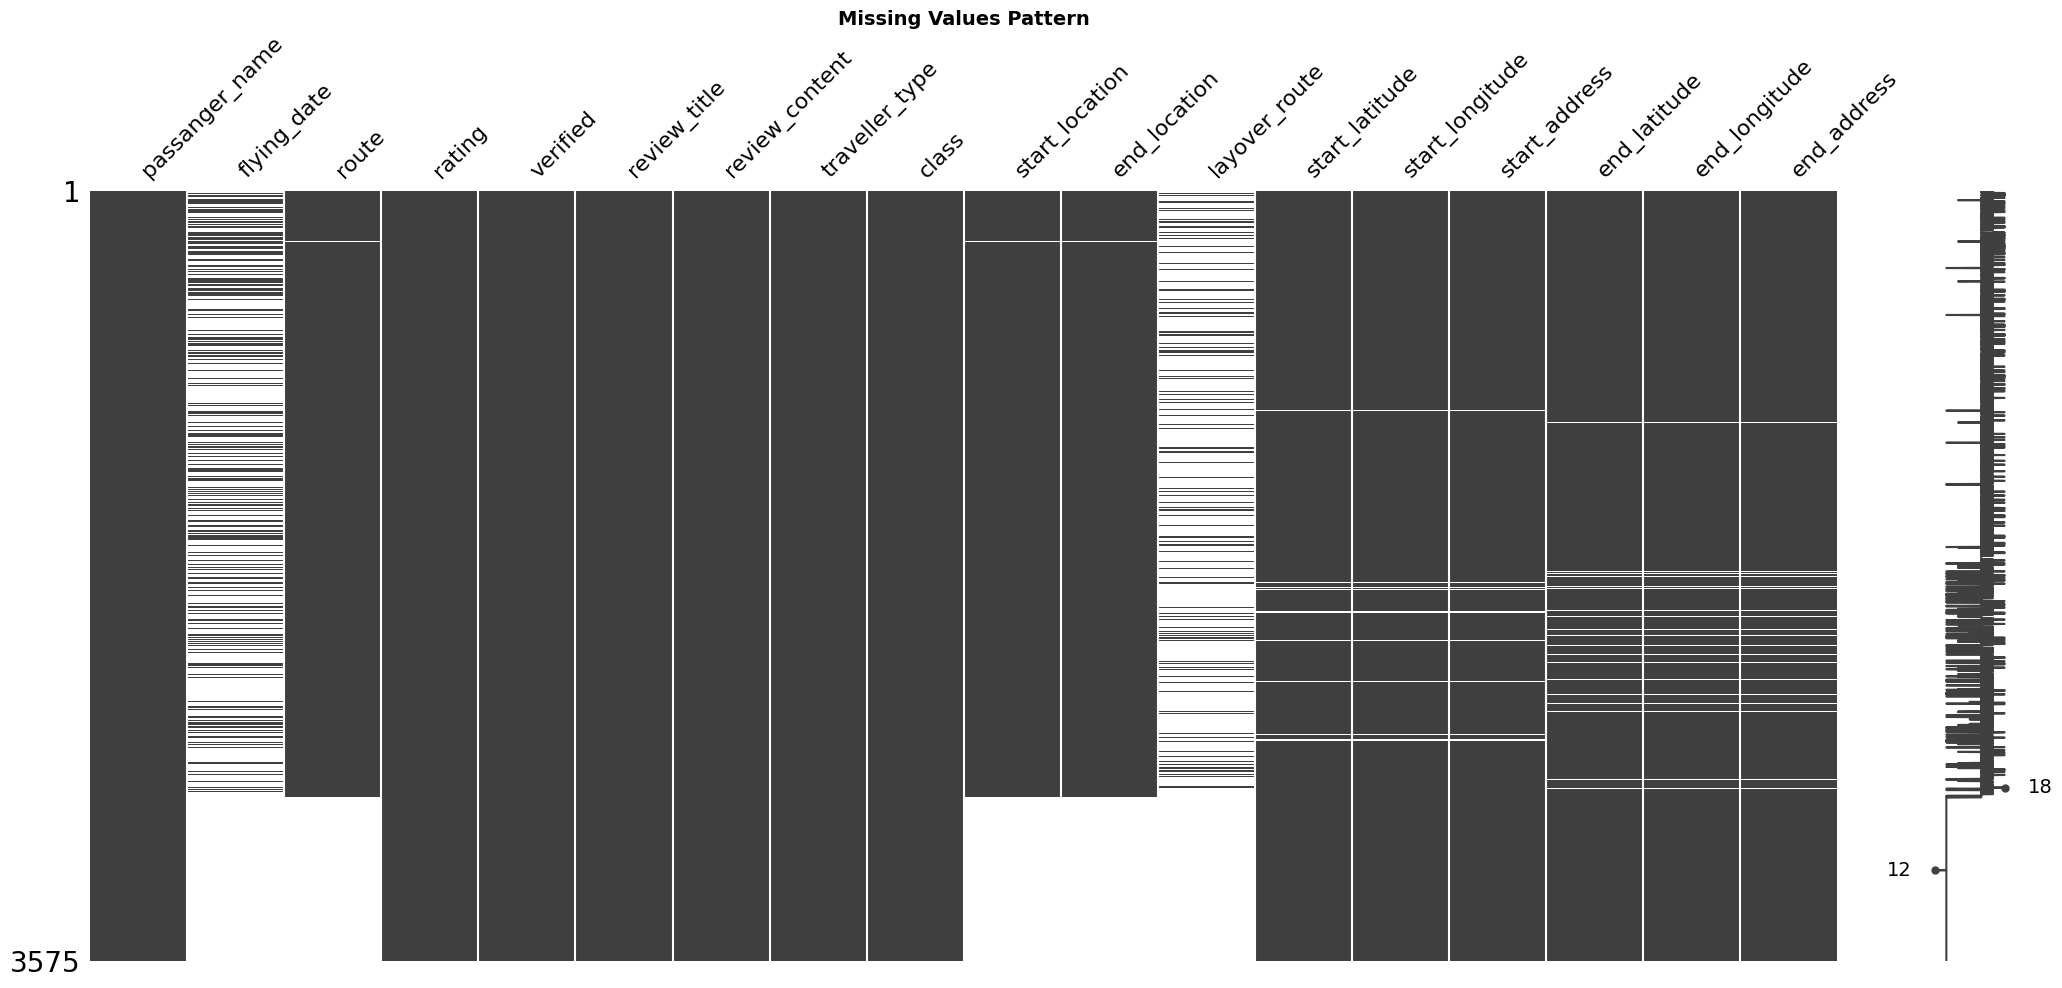

In [6]:
# MISSING VALUES VISUALIZATION
plt.figure(figsize=(12, 6))
msno.matrix(df)
plt.title("Missing Values Pattern", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [7]:
# CATEGORICAL FEATURES ANALYSIS
print("CATEGORICAL FEATURES ANALYSIS")
print("=" * 50)

categorical_cols = ['verified', 'traveller_type', 'class']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col.upper()}:")
        print("-" * (len(col) + 1))
        value_counts = df[col].value_counts()
        percentages = (value_counts / len(df)) * 100

        for idx, (value, count) in enumerate(value_counts.items()):
            print(f"  {value}: {count} ({percentages.iloc[idx]:.1f}%)")
    else:
        print(f"❌ Column '{col}' not found")


CATEGORICAL FEATURES ANALYSIS

VERIFIED:
---------
  Not Verified: 2508 (70.2%)
  Trip Verified: 1067 (29.8%)

TRAVELLER_TYPE:
---------------
  Couple Leisure: 949 (26.5%)
  Solo Leisure: 860 (24.1%)
  Unknown: 760 (21.3%)
  Business: 623 (17.4%)
  Family Leisure: 382 (10.7%)
  Various: 1 (0.0%)

CLASS:
------
  Economy Class: 1846 (51.6%)
  Business Class: 1160 (32.4%)
  Premium Economy: 358 (10.0%)
  First Class: 209 (5.8%)
  Unknown: 2 (0.1%)


In [8]:
df['traveller_type'] = df['traveller_type'].replace('Various', 'Unknown') # just move this various class just one record


In [9]:
# NUMERICAL FEATURES ANALYSIS  
print("NUMERICAL FEATURES ANALYSIS")
print("=" * 50)

# Rating analysis (our key feature)
if 'rating' in df.columns:
    print("\nRATING DISTRIBUTION:")
    print("-" * 20)
    rating_stats = df['rating'].describe()
    print(rating_stats)

    # Rating value counts
    print("\nRating breakdown:")
    rating_counts = df['rating'].value_counts().sort_index()
    for rating, count in rating_counts.items():
        percentage = (count / len(df)) * 100
        print(f"  Rating {rating}: {count} reviews ({percentage:.1f}%)")

# Statistical summary for all numerical columns
print("\nFULL STATISTICAL SUMMARY:")
print("-" * 30)
display(df.describe())


NUMERICAL FEATURES ANALYSIS

RATING DISTRIBUTION:
--------------------
count    3575.000000
mean        4.790490
std         3.170323
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        10.000000
Name: rating, dtype: float64

Rating breakdown:
  Rating 1: 805 reviews (22.5%)
  Rating 2: 409 reviews (11.4%)
  Rating 3: 396 reviews (11.1%)
  Rating 4: 246 reviews (6.9%)
  Rating 5: 230 reviews (6.4%)
  Rating 6: 189 reviews (5.3%)
  Rating 7: 309 reviews (8.6%)
  Rating 8: 361 reviews (10.1%)
  Rating 9: 304 reviews (8.5%)
  Rating 10: 326 reviews (9.1%)

FULL STATISTICAL SUMMARY:
------------------------------


,rating,start_latitude,start_longitude,end_latitude,end_longitude
count,3575.000000,3515.000000,3515.000000,3476.000000,3476.000000
mean,4.790490,42.639473,-2.164986,40.550399,-1.118816
std,3.170323,17.022014,44.576587,18.723619,46.045735
min,1.000000,-37.666951,-123.182909,-37.814245,-123.179234
25%,2.000000,41.893320,-0.458780,39.739236,-0.458780
50%,4.000000,46.314475,-0.127765,46.314475,-0.127765
75%,8.000000,51.467739,11.048029,51.467739,11.048029
max,10.000000,65.011873,151.208285,64.145981,174.550610


## 4. Data Cleaning & Preprocessing

Systematic approach to handle missing values and remove unnecessary data.


In [10]:
# SENTIMENT ANALYSIS FIRST (needed for other processing)
print("APPLYING SENTIMENT ANALYSIS")
print("=" * 40)

# Initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    """Extract sentiment compound score using VADER"""
    if pd.isna(text) or text == '':
        return 0.0
    try:
        scores = analyzer.polarity_scores(str(text))
        return scores['compound']
    except:
        return 0.0

# Apply sentiment analysis to review content
if 'review_content' in df.columns:
    print("Calculating sentiment scores...")
    df['sentiment_score'] = df['review_content'].apply(get_sentiment_score)

    # Create sentiment labels
    def categorize_sentiment(score):
        if score >= 0.05:
            return 'positive'
        elif score <= -0.05:
            return 'negative'
        else:
            return 'neutral'

    df['sentiment_label'] = df['sentiment_score'].apply(categorize_sentiment)

    print("✅ Sentiment analysis complete")
    print(f"Sentiment score range: {df['sentiment_score'].min():.3f} to {df['sentiment_score'].max():.3f}")
    print("\nSentiment distribution:")
    print(df['sentiment_label'].value_counts())
else:
    print("❌ review_content column not found")


APPLYING SENTIMENT ANALYSIS
Calculating sentiment scores...
✅ Sentiment analysis complete
Sentiment score range: -0.998 to 0.999

Sentiment distribution:
sentiment_label
positive    2080
negative    1455
neutral       40
Name: count, dtype: int64


In [11]:
# MISSING VALUES HANDLING STRATEGY
print("MISSING VALUES HANDLING")
print("=" * 30)

# Strategy for location data
missing_locations = df[['start_location', 'end_location']].isnull().sum()
print("Location missing values:")
print(missing_locations)

# Create coordinate-to-location mapping
def create_coordinate_location_mapping(df):
    """Create mapping from coordinates to locations using existing complete data"""
    start_mapping = {}
    end_mapping = {}

    # For start locations
    complete_start = df.dropna(subset=['start_location', 'start_latitude', 'start_longitude'])
    for _, row in complete_start.iterrows():
        coord_key = (round(row['start_latitude'], 4), round(row['start_longitude'], 4))
        if coord_key not in start_mapping:
            start_mapping[coord_key] = row['start_location']

    # For end locations  
    complete_end = df.dropna(subset=['end_location', 'end_latitude', 'end_longitude'])
    for _, row in complete_end.iterrows():
        coord_key = (round(row['end_latitude'], 4), round(row['end_longitude'], 4))
        if coord_key not in end_mapping:
            end_mapping[coord_key] = row['end_location']

    return start_mapping, end_mapping

# Apply coordinate mapping
start_map, end_map = create_coordinate_location_mapping(df)
print(f"Created mappings: {len(start_map)} start locations, {len(end_map)} end locations")


MISSING VALUES HANDLING
Location missing values:
start_location    766
end_location      766
dtype: int64
Created mappings: 281 start locations, 317 end locations


In [12]:
# FILL MISSING LOCATIONS
def extract_city_from_address(address):
    """Extract city name from address string"""
    if pd.isna(address) or address == '':
        return None

    # Split by comma and take the first meaningful part
    parts = str(address).split(',')
    if len(parts) > 0:
        city = parts[0].strip()
        # Clean up common prefixes
        if city.lower().startswith(('the ', 'city of ')):
            city = city[city.find(' ') + 1:].strip()
        return city if city else None
    return None

# Fill missing start_locations
df_filled = df.copy()
missing_start_mask = df_filled['start_location'].isnull()

for idx, row in df_filled[missing_start_mask].iterrows():
    if not pd.isna(row['start_latitude']) and not pd.isna(row['start_longitude']):
        coord_key = (round(row['start_latitude'], 4), round(row['start_longitude'], 4))
        if coord_key in start_map:
            df_filled.at[idx, 'start_location'] = start_map[coord_key]
        elif not pd.isna(row['start_address']):
            city = extract_city_from_address(row['start_address'])
            if city:
                df_filled.at[idx, 'start_location'] = city

# Fill missing end_locations  
missing_end_mask = df_filled['end_location'].isnull()

for idx, row in df_filled[missing_end_mask].iterrows():
    if not pd.isna(row['end_latitude']) and not pd.isna(row['end_longitude']):
        coord_key = (round(row['end_latitude'], 4), round(row['end_longitude'], 4))
        if coord_key in end_map:
            df_filled.at[idx, 'end_location'] = end_map[coord_key]
        elif not pd.isna(row['end_address']):
            city = extract_city_from_address(row['end_address'])
            if city:
                df_filled.at[idx, 'end_location'] = city

print("✅ Location filling complete")
print("Remaining missing values:")
print(df_filled[['start_location', 'end_location']].isnull().sum())


✅ Location filling complete
Remaining missing values:
start_location    0
end_location      0
dtype: int64


DATA CLEANING VERIFICATION
Missing values after cleaning:
passanger_name        1
flying_date        2620
route               766
layover_route      3091
start_latitude       60
start_longitude      60
start_address        60
end_latitude         99
end_longitude        99
end_address          99
dtype: int64


/tmp/ipykernel_37/2647673998.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1200x400 with 0 Axes>

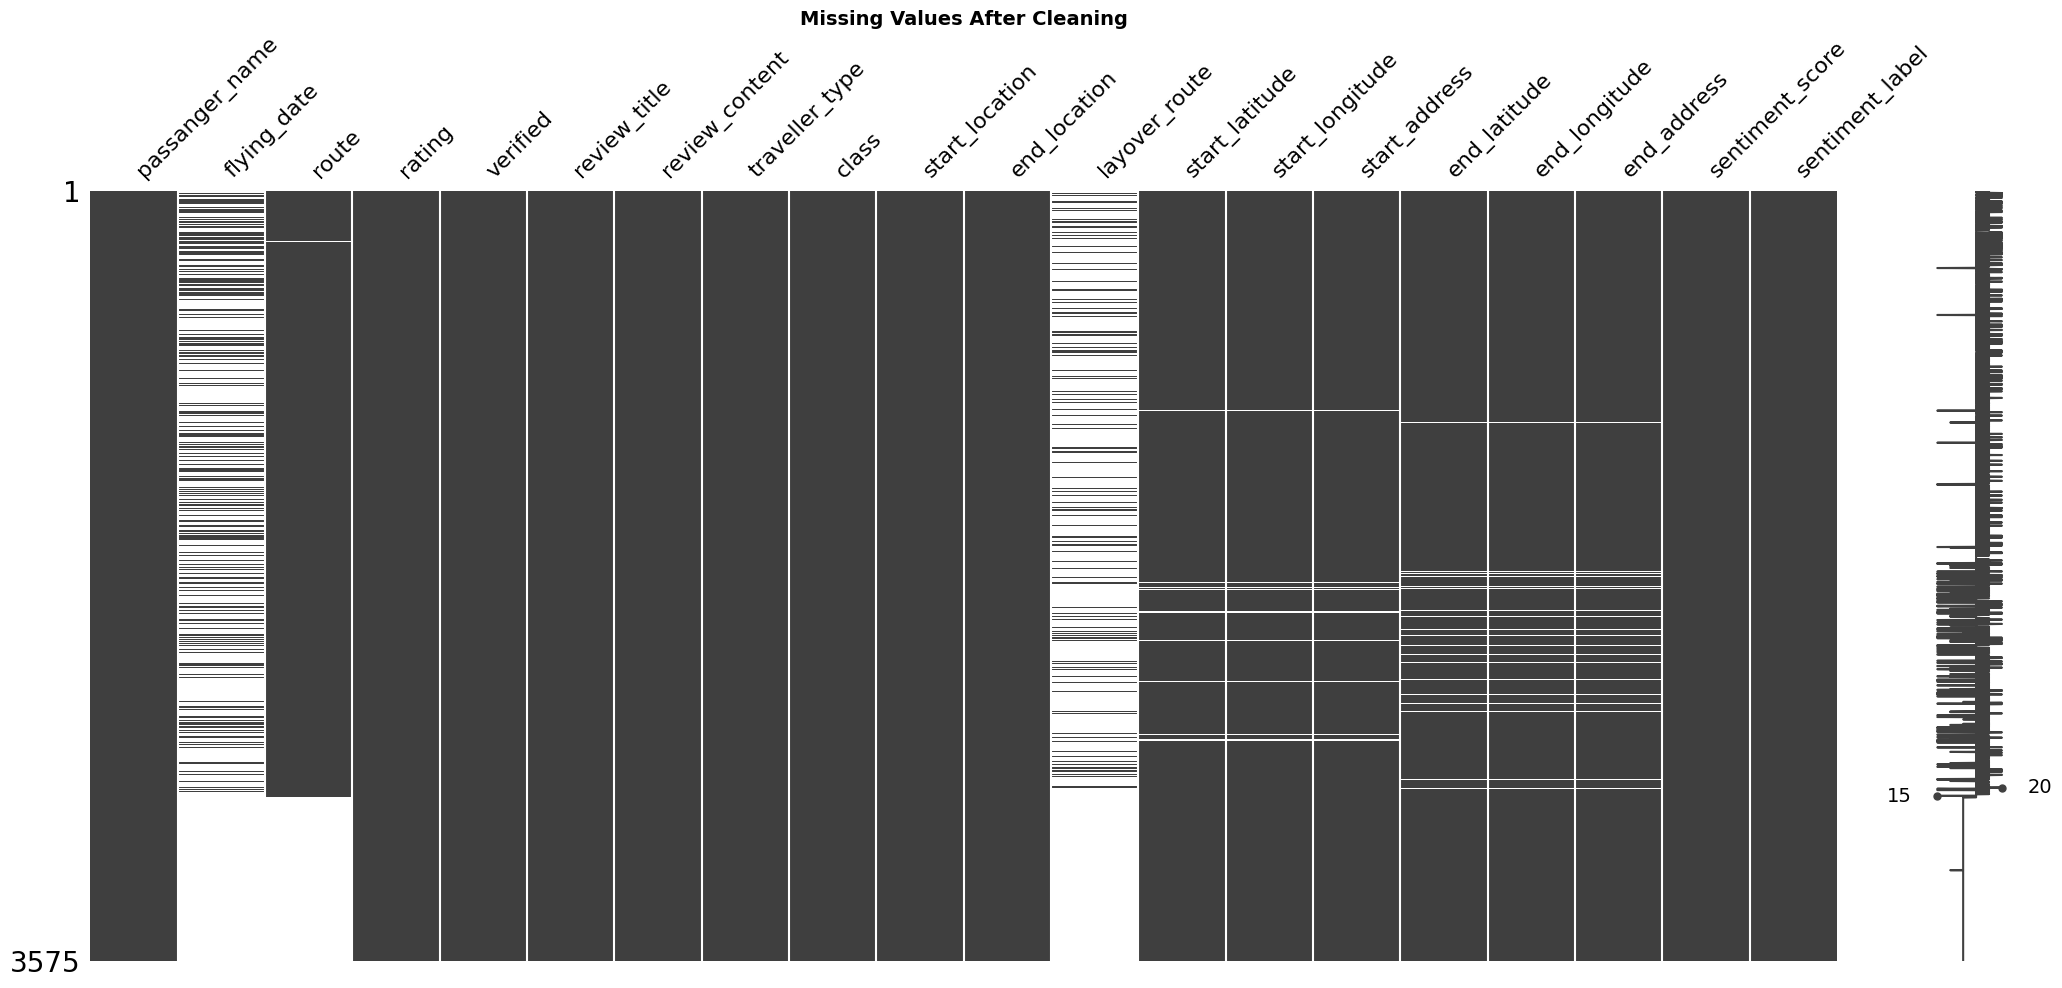


✅ Data cleaning complete
Clean dataset: 3575 rows × 20 columns


In [13]:
# VERIFY DATA CLEANING RESULTS
print("DATA CLEANING VERIFICATION")
print("=" * 40)

# Check remaining missing values
remaining_missing = df_filled.isnull().sum()
print("Missing values after cleaning:")
print(remaining_missing[remaining_missing > 0])

# Visualize final missing values pattern
plt.figure(figsize=(12, 4))
msno.matrix(df_filled)
plt.title("Missing Values After Cleaning", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n✅ Data cleaning complete")
print(f"Clean dataset: {df_filled.shape[0]} rows × {df_filled.shape[1]} columns")


## 5. Feature Engineering & Transformation

Create new features and transform existing ones for machine learning.


In [14]:
# FEATURE CREATION STRATEGY
print("FEATURE ENGINEERING")
print("=" * 30)

# 1. Create binary satisfaction target (main prediction target)
df_filled['satisfaction'] = (df_filled['rating'] >= 5).astype(int)

print("1. SATISFACTION TARGET CREATED:")
satisfaction_dist = df_filled['satisfaction'].value_counts()
print(f"   Satisfied (1): {satisfaction_dist.get(1, 0)} ({satisfaction_dist.get(1, 0)/len(df_filled)*100:.1f}%)")
print(f"   Not Satisfied (0): {satisfaction_dist.get(0, 0)} ({satisfaction_dist.get(0, 0)/len(df_filled)*100:.1f}%)")

# 2. Create route feature (combination of start and end locations)
df_filled['route'] = df_filled['start_location'].astype(str) + ' → ' + df_filled['end_location'].astype(str)

print(f"\n2. ROUTE FEATURE CREATED:")
print(f"   Total unique routes: {df_filled['route'].nunique()}")
print(f"   Sample routes:")
for route in df_filled['route'].value_counts().head(3).index:
    count = df_filled['route'].value_counts()[route]
    print(f"     {route}: {count} flights")

print(f"\n✅ Feature engineering complete")


FEATURE ENGINEERING
1. SATISFACTION TARGET CREATED:
   Satisfied (1): 1719 (48.1%)
   Not Satisfied (0): 1856 (51.9%)

2. ROUTE FEATURE CREATED:
   Total unique routes: 1378
   Sample routes:
     Nanno → Nanno: 766 flights
     London → Johannesburg: 16 flights
     London → Cape Town: 15 flights

✅ Feature engineering complete


In [15]:
# FEATURE ANALYSIS
print("FEATURE ANALYSIS SUMMARY")
print("=" * 40)

print("FINAL FEATURE SET:")
print("-" * 20)
for i, col in enumerate(df_filled.columns, 1):
    dtype = df_filled[col].dtype
    unique_vals = df_filled[col].nunique()
    print(f"{i:2d}. {col:<20} | {str(dtype):<10} | {unique_vals:>4} unique values")

print(f"\nDATASET STATISTICS:")
print(f"- Total samples: {len(df_filled):,}")
print(f"- Total features: {len(df_filled.columns)}")
print(f"- Memory usage: {df_filled.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Show sample of engineered features
print(f"\nSAMPLE DATA WITH NEW FEATURES:")
print("-" * 35)
display(df_filled[['rating', 'satisfaction', 'sentiment_score', 'sentiment_label', 'route']].head())


FEATURE ANALYSIS SUMMARY
FINAL FEATURE SET:
--------------------
 1. passanger_name       | object     | 2759 unique values
 2. flying_date          | object     |  100 unique values
 3. route                | object     | 1378 unique values
 4. rating               | int64      |   10 unique values
 5. verified             | object     |    2 unique values
 6. review_title         | object     | 2570 unique values
 7. review_content       | object     | 3501 unique values
 8. traveller_type       | object     |    5 unique values
 9. class                | object     |    5 unique values
10. start_location       | object     |  333 unique values
11. end_location         | object     |  412 unique values
12. layover_route        | object     |   50 unique values
13. start_latitude       | float64    |  282 unique values
14. start_longitude      | float64    |  282 unique values
15. start_address        | object     |  284 unique values
16. end_latitude         | float64    |  318 uniqu

,rating,satisfaction,sentiment_score,sentiment_label,route
0,1,0,-0.7990,negative,New Orleans → London
1,1,0,0.0219,neutral,London → Amman
2,2,0,-0.7096,negative,London Heathrow → Bodrum
3,4,0,-0.5849,negative,Amman → London
4,7,1,0.9789,positive,London City → Ibiza


## 6. Feature Encoding for Machine Learning

Convert all categorical variables to numerical format using appropriate encoding strategies.


In [16]:
# ENCODING STRATEGY IMPLEMENTATION
print("FEATURE ENCODING STRATEGY")
print("=" * 40)

# Create working copy for encoding
df_encoded = df_filled.copy()

# 1. TARGET ENCODING for high-cardinality location features
def target_encode(df, feature_col, target_col):
    """Apply target encoding using mean of target variable"""
    mean_target = df.groupby(feature_col)[target_col].mean()
    return df[feature_col].map(mean_target)

print("1. TARGET ENCODING (Locations):")
print("-" * 35)

# Encode start and end locations separately
df_encoded['start_location_encoded'] = target_encode(df_encoded, 'start_location', 'satisfaction')
df_encoded['end_location_encoded'] = target_encode(df_encoded, 'end_location', 'satisfaction')

print(f"   start_location: {df_encoded['start_location'].nunique()} categories → 1 numerical feature")
print(f"   end_location: {df_encoded['end_location'].nunique()} categories → 1 numerical feature")
print("   Encoding values represent mean satisfaction rate per location")

# 2. LABEL ENCODING for binary features
print("\n2. LABEL ENCODING (Binary Features):")
print("-" * 38)

le_verified = LabelEncoder()
df_encoded['verified_encoded'] = le_verified.fit_transform(df_encoded['verified'])

print(f"   verified: {df_encoded['verified'].nunique()} categories → 1 binary feature")
verification_mapping = dict(zip(le_verified.classes_, le_verified.transform(le_verified.classes_)))
print(f"   Mapping: {verification_mapping}")


FEATURE ENCODING STRATEGY
1. TARGET ENCODING (Locations):
-----------------------------------
   start_location: 333 categories → 1 numerical feature
   end_location: 412 categories → 1 numerical feature
   Encoding values represent mean satisfaction rate per location

2. LABEL ENCODING (Binary Features):
--------------------------------------
   verified: 2 categories → 1 binary feature
   Mapping: {'Not Verified': 0, 'Trip Verified': 1}


In [17]:
# 3. ONE-HOT ENCODING for multi-category features
print("3. ONE-HOT ENCODING (Multi-category Features):")
print("-" * 48)

# Apply one-hot encoding to traveller_type and class
categorical_features = ['traveller_type', 'class']
df_encoded = pd.get_dummies(df_encoded, columns=categorical_features, drop_first=False)

print(f"Applied one-hot encoding to: {categorical_features}")

# Show new columns created
traveller_cols = [col for col in df_encoded.columns if col.startswith('traveller_type_')]
class_cols = [col for col in df_encoded.columns if col.startswith('class_')]

print(f"\nTraveller type columns ({len(traveller_cols)}):")
for col in traveller_cols:
    print(f"   - {col}")

print(f"\nClass columns ({len(class_cols)}):")
for col in class_cols:
    print(f"   - {col}")

print("\n4. REFERENCE CATEGORY REMOVAL (Avoid Multicollinearity):")
print("-" * 58)

# Remove Unknown categories as reference categories
reference_cols_to_drop = ['traveller_type_Unknown', 'class_Unknown']
existing_ref_cols = [col for col in reference_cols_to_drop if col in df_encoded.columns]
df_encoded = df_encoded.drop(columns=existing_ref_cols)

print(f"Dropped reference categories: {existing_ref_cols}")
print("These serve as baseline (when all other categories = 0)")


3. ONE-HOT ENCODING (Multi-category Features):
------------------------------------------------
Applied one-hot encoding to: ['traveller_type', 'class']

Traveller type columns (5):
   - traveller_type_Business
   - traveller_type_Couple Leisure
   - traveller_type_Family Leisure
   - traveller_type_Solo Leisure
   - traveller_type_Unknown

Class columns (5):
   - class_Business Class
   - class_Economy Class
   - class_First Class
   - class_Premium Economy
   - class_Unknown

4. REFERENCE CATEGORY REMOVAL (Avoid Multicollinearity):
----------------------------------------------------------
Dropped reference categories: ['traveller_type_Unknown', 'class_Unknown']
These serve as baseline (when all other categories = 0)


## 7. Final Dataset Analysis & Export

Quality assurance and export of the final processed dataset.


In [18]:
# FINAL DATASET QUALITY ASSURANCE
print("FINAL DATASET QUALITY ASSURANCE")
print("=" * 50)

# Check for any remaining missing values
missing_final = df_encoded.isnull().sum()
print("1. MISSING VALUES CHECK:")
print("-" * 25)
if missing_final.sum() == 0:
    print("   ✅ No missing values in final dataset")
else:
    print("   ⚠️  Remaining missing values:")
    print(missing_final[missing_final > 0])

# Check data types
print("\n2. DATA TYPES VERIFICATION:")
print("-" * 30)
dtype_summary = df_encoded.dtypes.value_counts()
print(dtype_summary)

# Statistical summary of encoded features
print("\n3. ENCODED FEATURES STATISTICS:")
print("-" * 35)
display(df_encoded.describe())

# Target variable distribution
print("\n4. TARGET VARIABLE BALANCE:")
print("-" * 30)
target_dist = df_encoded['satisfaction'].value_counts()
target_pct = df_encoded['satisfaction'].value_counts(normalize=True) * 100
print(f"   Class 0 (Not Satisfied): {target_dist[0]:,} samples ({target_pct[0]:.1f}%)")
print(f"   Class 1 (Satisfied): {target_dist[1]:,} samples ({target_pct[1]:.1f}%)")

balance_ratio = min(target_dist) / max(target_dist)
print(f"   Balance ratio: {balance_ratio:.3f} ({'Balanced' if balance_ratio > 0.3 else 'Imbalanced'})")


FINAL DATASET QUALITY ASSURANCE
1. MISSING VALUES CHECK:
-------------------------
   ⚠️  Remaining missing values:
passanger_name        1
flying_date        2620
layover_route      3091
start_latitude       60
start_longitude      60
start_address        60
end_latitude         99
end_longitude        99
end_address          99
dtype: int64

2. DATA TYPES VERIFICATION:
------------------------------
object     12
bool        8
float64     7
int64       3
Name: count, dtype: int64

3. ENCODED FEATURES STATISTICS:
-----------------------------------


,rating,start_latitude,start_longitude,end_latitude,end_longitude,sentiment_score,satisfaction,start_location_encoded,end_location_encoded,verified_encoded
count,3575.000000,3515.000000,3515.000000,3476.000000,3476.000000,3575.000000,3575.000000,3575.000000,3575.000000,3575.000000
mean,4.790490,42.639473,-2.164986,40.550399,-1.118816,0.171523,0.480839,0.480839,0.480839,0.298462
std,3.170323,17.022014,44.576587,18.723619,46.045735,0.776257,0.499703,0.190930,0.200742,0.457647
min,1.000000,-37.666951,-123.182909,-37.814245,-123.179234,-0.997500,0.000000,0.000000,0.000000,0.000000
25%,2.000000,41.893320,-0.458780,39.739236,-0.458780,-0.717700,0.000000,0.395582,0.355330,0.000000
50%,4.000000,46.314475,-0.127765,46.314475,-0.127765,0.491400,0.000000,0.500000,0.466819,0.000000
75%,8.000000,51.467739,11.048029,51.467739,11.048029,0.932250,1.000000,0.651436,0.651436,1.000000
max,10.000000,65.011873,151.208285,64.145981,174.550610,0.999200,1.000000,1.000000,1.000000,1.000000



4. TARGET VARIABLE BALANCE:
------------------------------
   Class 0 (Not Satisfied): 1,856 samples (51.9%)
   Class 1 (Satisfied): 1,719 samples (48.1%)
   Balance ratio: 0.926 (Balanced)


## 8. Final Column Cleanup & Dataset Preparation

Now we remove all unnecessary columns in one comprehensive operation before saving the final dataset.


<Axes: >

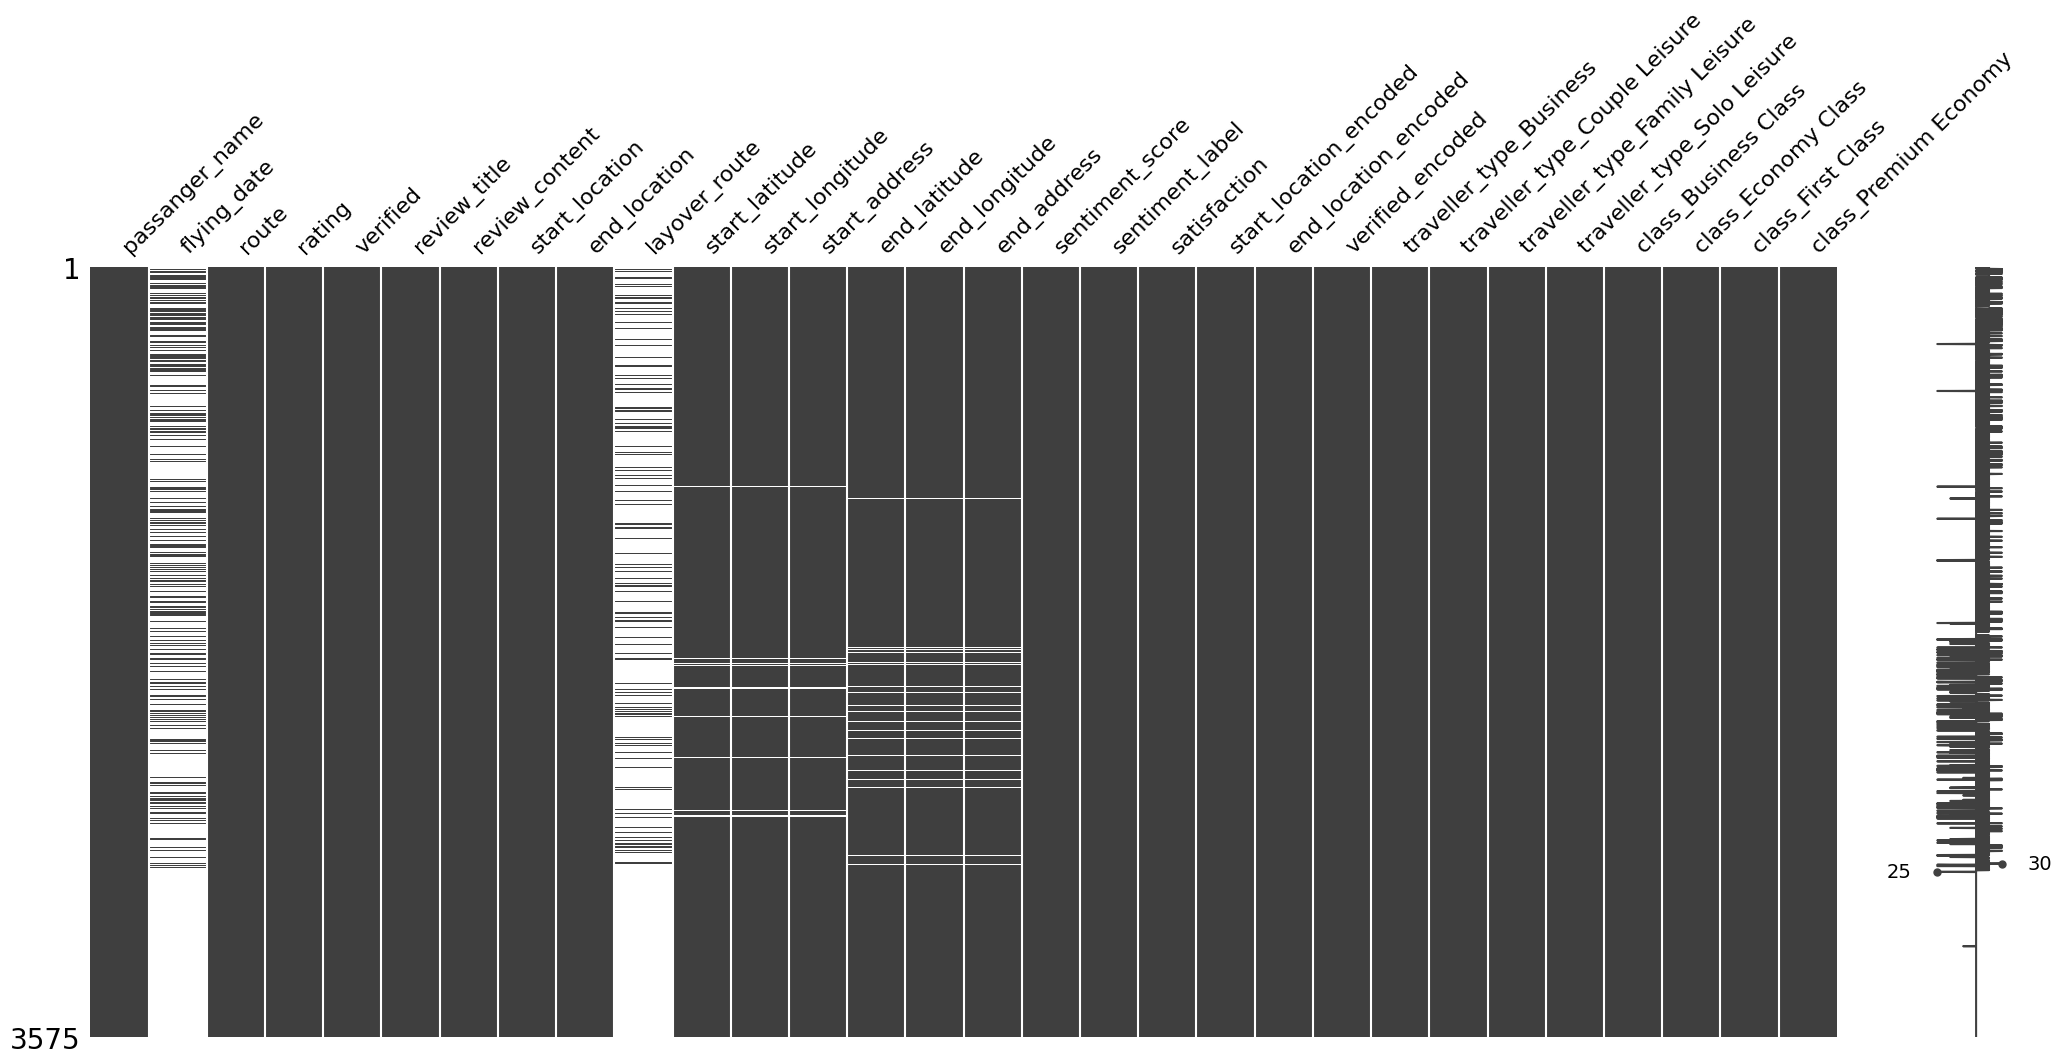

In [19]:
msno.matrix(df_encoded)

In [20]:
# FINAL COMPREHENSIVE COLUMN CLEANUP - ALL DROPS AT ONCE
print("FINAL COLUMN CLEANUP")
print("=" * 50)

# All columns to remove in one operation:

# 1. Unnecessary raw data columns
raw_data_columns = [
    'passanger_name',        # Personal identifier - not needed
    'flying_date',           # Date information - not relevant
    'review_title',          # Redundant with review_content
    'review_content',        # Raw text - replaced by sentiment_score
    'layover_route',         # Sparse data, not useful
    'start_latitude',        # Replaced by encoded locations
    'start_longitude',       # Replaced by encoded locations
    'end_latitude',          # Replaced by encoded locations
    'end_longitude',         # Replaced by encoded locations
    'start_address',         # Replaced by encoded locations
    'end_address'            # Replaced by encoded locations
]

# 2. Original categorical columns (after encoding)
original_categorical_columns = [
    'rating',               # DATA LEAKAGE: satisfaction derived from rating
    'verified',             # Replaced by verified_encoded
    'start_location',       # Replaced by start_location_encoded
    'end_location',         # Replaced by end_location_encoded
    'route',               # Redundant (captured in location encoding)
    'sentiment_label'       # Keep only sentiment_score (continuous better)
]

# 3. Reference categories (avoid dummy variable trap)
reference_categories = [
    'traveller_type_Unknown',  # Reference for traveller types
    'class_Unknown'            # Reference for class types
]

# Combine ALL columns to drop
all_columns_to_drop = raw_data_columns + original_categorical_columns + reference_categories

# Drop only columns that exist in the dataframe
existing_cols_to_drop = [col for col in all_columns_to_drop if col in df_encoded.columns]
df_final = df_encoded.drop(columns=existing_cols_to_drop)

# Report what was dropped
print(f"DROPPED {len(existing_cols_to_drop)} COLUMNS:")
print("-" * 40)
for i, col in enumerate(existing_cols_to_drop, 1):
    if col in raw_data_columns:
        category = "Raw Data"
    elif col in original_categorical_columns:
        category = "Original Categorical"
    else:
        category = "Reference Category"
    print(f"  {i:2d}. {col:<25} ({category})")

print(f"\n✅ FINAL DATASET READY:")
print(f"   Shape: {df_final.shape}")
print(f"   Features: {df_final.shape[1] - 1} (+ 1 target)")

# Show final columns
print(f"\nFINAL FEATURE SET:")
print("-" * 25)
target_col = "satisfaction"
feature_cols = [col for col in df_final.columns if col != target_col]
print(f"TARGET: {target_col}")
print(f"FEATURES ({len(feature_cols)}):")
for i, col in enumerate(feature_cols, 1):
    print(f"  {i:2d}. {col}")


FINAL COLUMN CLEANUP
DROPPED 17 COLUMNS:
----------------------------------------
   1. passanger_name            (Raw Data)
   2. flying_date               (Raw Data)
   3. review_title              (Raw Data)
   4. review_content            (Raw Data)
   5. layover_route             (Raw Data)
   6. start_latitude            (Raw Data)
   7. start_longitude           (Raw Data)
   8. end_latitude              (Raw Data)
   9. end_longitude             (Raw Data)
  10. start_address             (Raw Data)
  11. end_address               (Raw Data)
  12. rating                    (Original Categorical)
  13. verified                  (Original Categorical)
  14. start_location            (Original Categorical)
  15. end_location              (Original Categorical)
  16. route                     (Original Categorical)
  17. sentiment_label           (Original Categorical)

✅ FINAL DATASET READY:
   Shape: (3575, 13)
   Features: 12 (+ 1 target)

FINAL FEATURE SET:
---------------------

<Axes: >

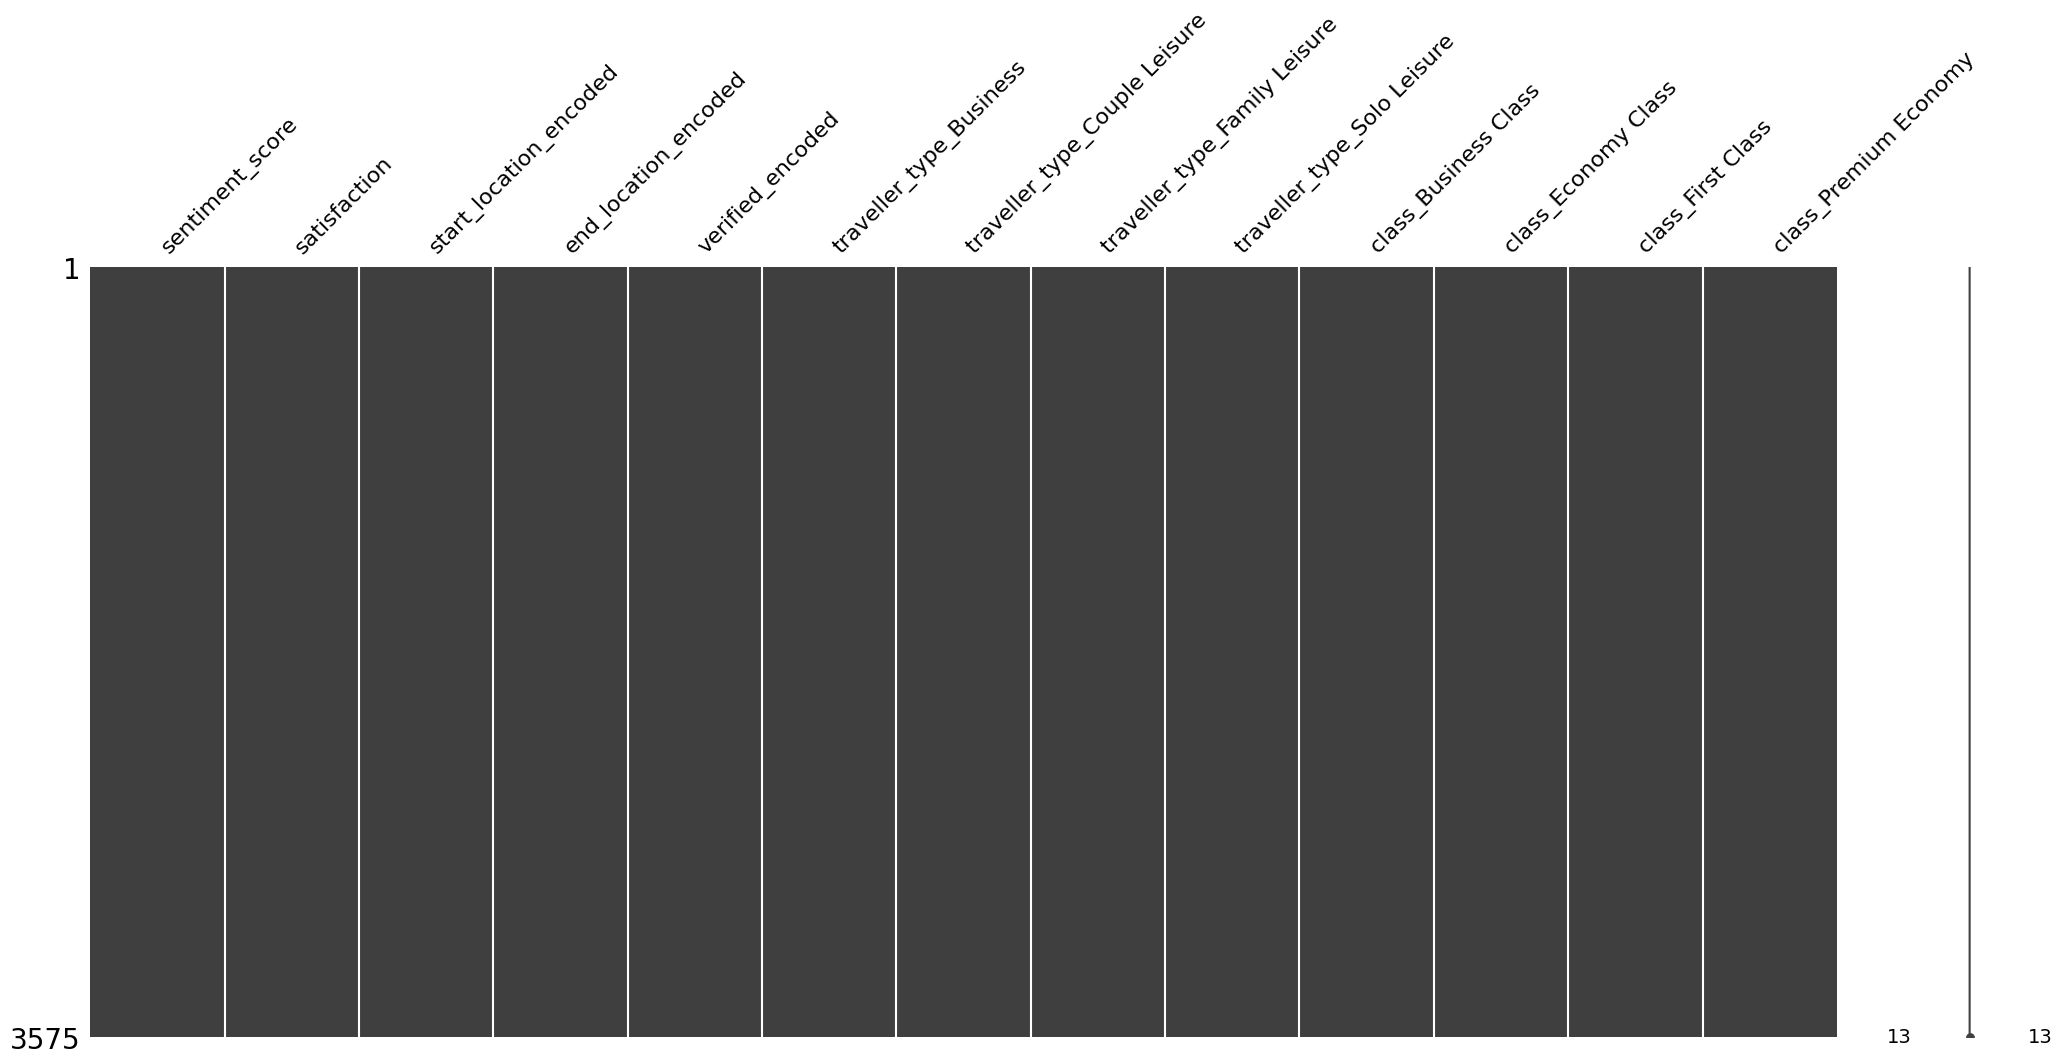

In [21]:
msno.matrix(df_final)

5. FEATURE CORRELATION ANALYSIS:
-----------------------------------


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


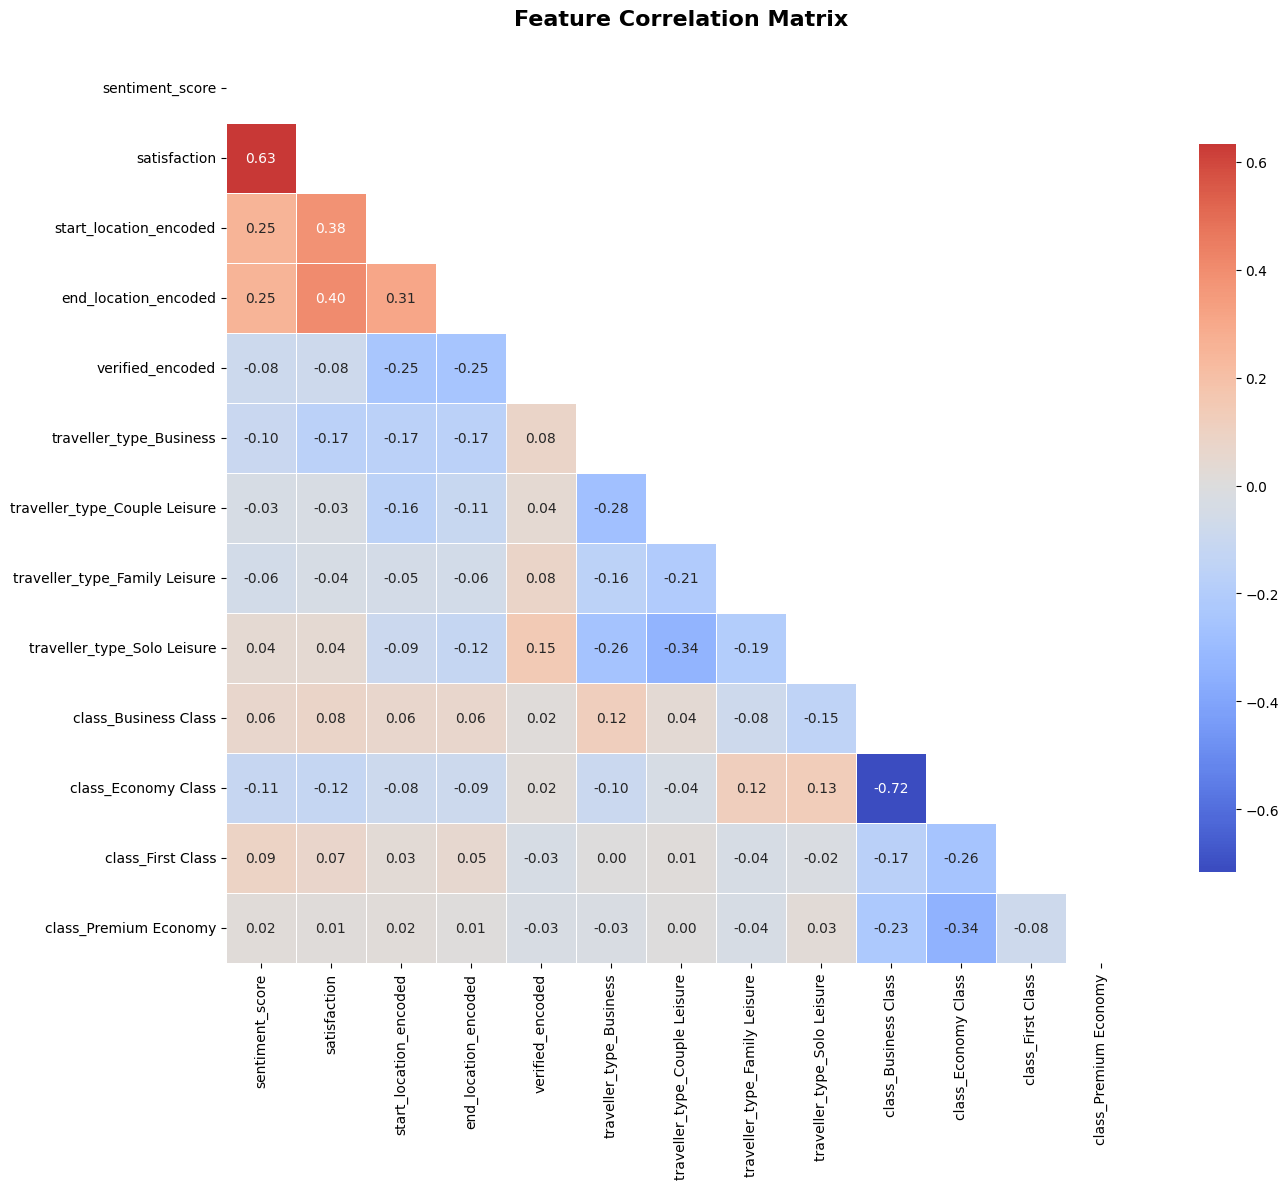


✅ No concerning correlations (all |r| ≤ 0.8)


In [22]:
# FEATURE CORRELATION ANALYSIS
print("5. FEATURE CORRELATION ANALYSIS:")
print("-" * 35)

# Calculate correlation matrix for numerical features
corr_matrix = df_final.corr()

# Create correlation heatmap
plt.figure(figsize=(15, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Show only lower triangle
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identify highly correlated features
high_corr_threshold = 0.8
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > high_corr_threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

if high_corr_pairs:
    print(f"\n⚠️  High correlations (|r| > {high_corr_threshold}):")
    for col1, col2, corr_val in high_corr_pairs:
        print(f"   {col1} ↔ {col2}: {corr_val:.3f}")
else:
    print(f"\n✅ No concerning correlations (all |r| ≤ {high_corr_threshold})")


In [23]:
# EXPORT FINAL DATASET
print("\n6. DATASET EXPORT:")
print("-" * 20)

# Export to CSV
output_filename = 'airline_scrapped_review_final_dataset.csv'
df_final.to_csv(output_filename, index=False)

print(f"✅ Dataset exported: {output_filename}")
print(f"   Shape: {df_final.shape}")
print(f"   Size: {df_final.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Create feature documentation
feature_doc = {
    'satisfaction': 'Target variable: 1 if rating ≥ 5, 0 otherwise',
    'sentiment_score': 'VADER sentiment compound score (-1 to +1)',
    'start_location_encoded': 'Target encoded start location (mean satisfaction)',
    'end_location_encoded': 'Target encoded end location (mean satisfaction)', 
    'verified_encoded': 'Label encoded verification status (0/1)',
}

# Add one-hot encoded features to documentation
for col in df_final.columns:
    if col.startswith('traveller_type_'):
        feature_doc[col] = f'Binary indicator for {col.replace("traveller_type_", "")} traveller type'
    elif col.startswith('class_'):
        feature_doc[col] = f'Binary indicator for {col.replace("class_", "")} class'

print(f"\nFEATURE DOCUMENTATION:")
print("-" * 25)
for feature, description in feature_doc.items():
    if feature in df_final.columns:
        print(f"   {feature:<30}: {description}")

print(f"\n🎉 DATA PREPROCESSING PIPELINE COMPLETE!")
print(f"   Ready for machine learning model training")



6. DATASET EXPORT:
--------------------
✅ Dataset exported: airline_scrapped_review_final_dataset.csv
   Shape: (3575, 13)
   Size: 0.16 MB

FEATURE DOCUMENTATION:
-------------------------
   satisfaction                  : Target variable: 1 if rating ≥ 5, 0 otherwise
   sentiment_score               : VADER sentiment compound score (-1 to +1)
   start_location_encoded        : Target encoded start location (mean satisfaction)
   end_location_encoded          : Target encoded end location (mean satisfaction)
   verified_encoded              : Label encoded verification status (0/1)
   traveller_type_Business       : Binary indicator for Business traveller type
   traveller_type_Couple Leisure : Binary indicator for Couple Leisure traveller type
   traveller_type_Family Leisure : Binary indicator for Family Leisure traveller type
   traveller_type_Solo Leisure   : Binary indicator for Solo Leisure traveller type
   class_Business Class          : Binary indicator for Business Class c